In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("incident_event_log.csv")
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [3]:
data = pd.read_csv("incident_event_log.csv")
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [4]:
data.replace({'?':np.nan},inplace = True)

In [5]:
data.isnull().sum().sort_values(ascending = False)

caused_by                  141689
vendor                     141468
cmdb_ci                    141267
rfc                        140721
problem_id                 139417
sys_created_at              53076
sys_created_by              53076
u_symptom                   32964
assigned_to                 27496
assignment_group            14213
opened_by                    4835
resolved_at                  3141
closed_code                   714
resolved_by                   226
subcategory                   111
category                       78
location                       76
caller_id                      29
reassignment_count              0
active                          0
incident_state                  0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
opened_at                       0
closed_at                       0
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
impact        

## Attributes information:

* We have 29 featues which are of Object data type which will be converted into categorical features during the modelling process
* We have 3 integer data type features
* We have 4 boolean data type features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [7]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [8]:
data.shape

(141712, 36)

## Problem Statement

* Our data set consists of 1.4L data points with 34 features + 2 features(dependent variables)**
* The features which we are considering as dependent variables are(according to the source) :**
    * **Resolved_at**
    * **closed_at**
* With respect to the dependent variables , we can consider doing of machine learning problems, such as regression classification and cluster analysis. 
    * **How Regression?**
        * We will consider the time difference between the sys_created_at and resolved_at features, in this case we can understand how much time will the new raised ticket will take to resolve.
    * **How Classification?**
        * We can consider the closed_code as our dependent variable , and predict the closed code for the ticket raised.
    * **How Cluster Analysis?**
        * We can understand which tickets can be considered as a similar cluster and work on why those tickets were considered as similar that would be helpful in making the client experience better.

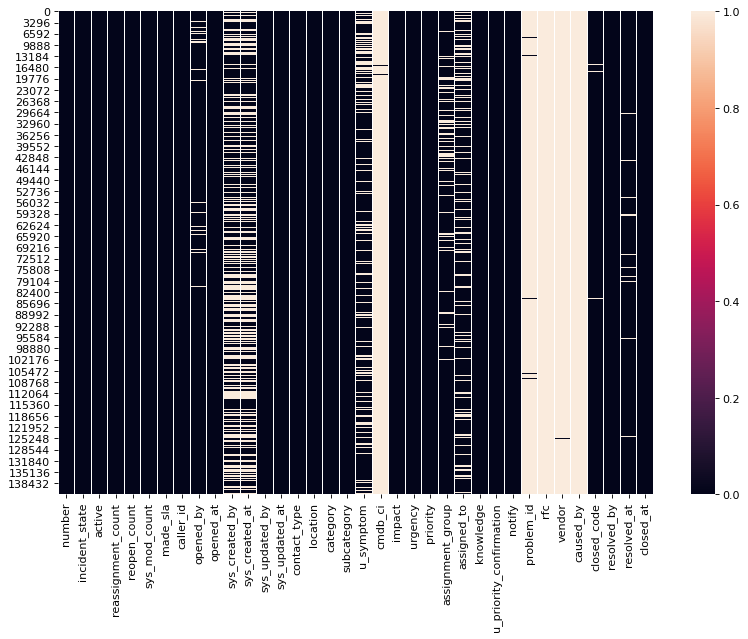

In [9]:
plt.figure(num = None, figsize = (12,8),dpi = 80,facecolor = 'w',edgecolor ='k')
sns.heatmap(data.isnull())
plt.show()

# TAKING ONLY THE REQUIRED FEATURES

In [10]:
data['opened_at'] = pd.to_datetime(data['opened_at'],dayfirst = True)

data['closed_at'] = pd.to_datetime(data['closed_at'],dayfirst = True)

In [11]:
final_df = data[['incident_state','reassignment_count','reopen_count','sys_mod_count','priority','made_sla','location','category','subcategory','opened_at','closed_at']]

* **We are taking the time differenc between the opened_at and closed_at features, keeping the time delta in terms of hours and changing it, in terms of days. We will be using this as our dependent feature.**

In [12]:
no_days = final_df['closed_at'] - final_df['opened_at']
time_taken_to_resolve = np.ceil(no_days.astype('timedelta64[h]')/24)
final_df['TIME'] = time_taken_to_resolve
final_df.drop(['opened_at','closed_at'],axis = 1,inplace = True)

In [13]:
final_df.head()

,incident_state,reassignment_count,reopen_count,sys_mod_count,priority,made_sla,location,category,subcategory,TIME
0,New,0,0,0,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
1,Resolved,0,0,2,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
2,Resolved,0,0,3,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
3,Closed,0,0,4,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
4,New,0,0,0,3 - Moderate,True,Location 165,Category 40,Subcategory 215,7.0


In [14]:
final_df.fillna("missing",inplace = True)

* **As it could be obvious that the number of active cases would be more when compared to the closed or resolved cases.**

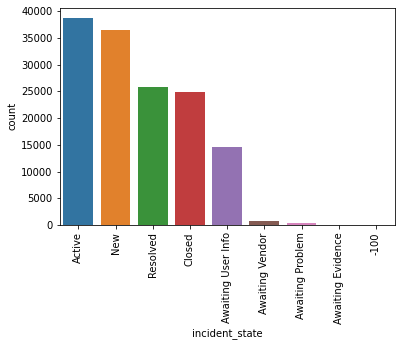

In [15]:
sns.countplot(final_df['incident_state'],order = final_df['incident_state'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

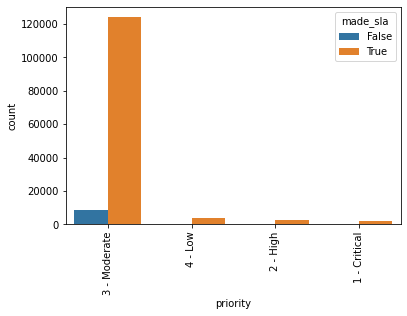

In [16]:
sns.countplot(x = 'priority',data = final_df,hue = 'made_sla',order = final_df['priority'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [17]:
pd.crosstab(data['made_sla'],data['priority'],normalize = 'columns')

priority,1 - Critical,2 - High,3 - Moderate,4 - Low
made_sla,,,,
False,0.11736,0.136608,0.063563,0.031017
True,0.88264,0.863392,0.936437,0.968983


* **If we look at the correlation plot between the numerical features in the data set including the dependent variable, we see a good co relation between the sys_mod_count and time and a little corelation between the time and the reassignment_count features, which means these are definitely important during our machine learning process.**

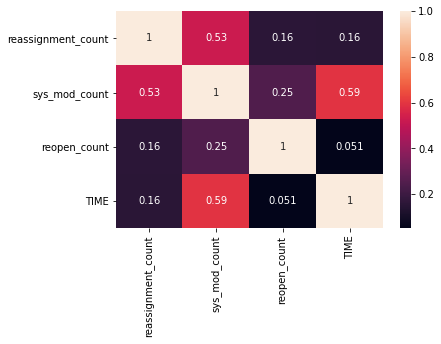

In [18]:
sns.heatmap(final_df[['reassignment_count','sys_mod_count','reopen_count','TIME']].corr(),annot = True)
plt.show()

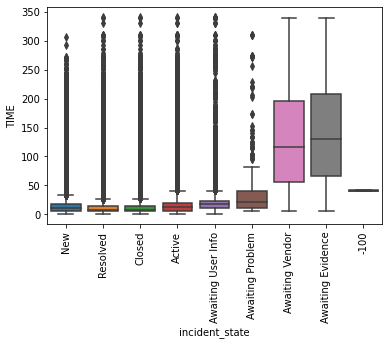

In [19]:
sns.boxplot(x = 'incident_state', y = 'TIME',data = final_df)
plt.xticks(rotation = 90)
plt.show()

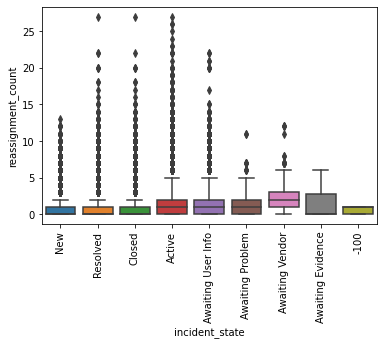

In [20]:
sns.boxplot(x = 'incident_state', y = 'reassignment_count',data = final_df)
plt.xticks(rotation = 90)
plt.show()

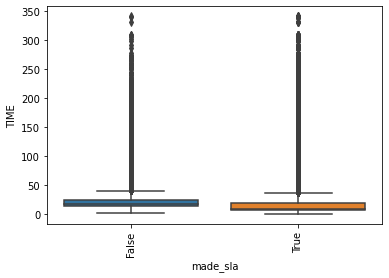

In [21]:
sns.boxplot(x = 'made_sla', y = 'TIME',data = final_df)
plt.xticks(rotation = 90)
plt.show()

* **Looking at all the different box plots we were able to plot, it is obvious that there are alot of extreme values in every feature, and we actually cant ignore or remove these extreme values as there are the cases/incidents which we need to look at more and find out the insights as to why did these incidents take more time or something like that.**

# STATISTICS

In [22]:
final_df = final_df[final_df['incident_state'] != '-100']

In [23]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

* **We will first check if incident state is effecting the time, as we have multiple incident states which are greater than 2 we will perform the ANOVA test.**

In [24]:
IST_group_by = final_df[['incident_state','TIME']].groupby('incident_state')


New = IST_group_by.get_group("New")['TIME']
Resolved = IST_group_by.get_group("Resolved")['TIME']
Closed = IST_group_by.get_group("Closed")['TIME']
Active = IST_group_by.get_group("Active")['TIME']
Awaiting_User_Info = IST_group_by.get_group("Awaiting User Info")['TIME']
Awaiting_Problem = IST_group_by.get_group("Awaiting Problem")['TIME']
Awaiting_Vendor = IST_group_by.get_group("Awaiting Vendor")['TIME']
Awaiting_Evidence = IST_group_by.get_group("Awaiting Evidence")['TIME']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

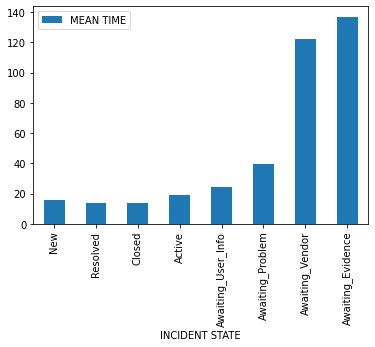

In [25]:
df_1 = pd.DataFrame({'INCIDENT STATE':['New', 'Resolved', 'Closed','Active','Awaiting_User_Info','Awaiting_Problem','Awaiting_Vendor','Awaiting_Evidence'], 'MEAN TIME':[New.mean(),Resolved.mean(),Closed.mean(),Active.mean(),Awaiting_User_Info.mean(),Awaiting_Problem.mean(),Awaiting_Vendor.mean(),Awaiting_Evidence.mean()]})
ax = df_1.plot.bar(x='INCIDENT STATE', y='MEAN TIME', rot=0)
plt.xticks(rotation = 90)

**Hypothesis for the test:**
   * H0 : The mean time for all groups are equal 
   * Ha : The means time for all groups are not equal 
        
**if P_value < 0.05 then we will REJECT the null hypothesis(H0).**

In [26]:
t_stats,p_value = f_oneway(New,Resolved,Closed,Active, Awaiting_User_Info,Awaiting_Problem,Awaiting_Vendor,Awaiting_Evidence)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")



The t_statistic value is : 2171.6518337936886
The p_value of the test is : 0.0


* **As the P_value is <0.05 we will reject the null hypothesis.**
* The means are different for different groups, which means that this feature is important for our modelling.

* **We will now perform another ANOVA test for incident_state and the reassignment_count, to check if the the reassignment count is different for different incident_state and if it is not different then we can just remove the reassignment_count feature.**

In [27]:
ISRAC_group_by = final_df[['incident_state','reassignment_count']].groupby("incident_state")

New = ISRAC_group_by.get_group("New")['reassignment_count']
Resolved = ISRAC_group_by.get_group("Resolved")['reassignment_count']
Closed = ISRAC_group_by.get_group("Closed")['reassignment_count']
Active = ISRAC_group_by.get_group("Active")['reassignment_count']
Awaiting_User_Info = ISRAC_group_by.get_group("Awaiting User Info")['reassignment_count']
Awaiting_Problem = ISRAC_group_by.get_group("Awaiting Problem")['reassignment_count']
Awaiting_Vendor = ISRAC_group_by.get_group("Awaiting Vendor")['reassignment_count']
Awaiting_Evidence = ISRAC_group_by.get_group("Awaiting Evidence")['reassignment_count']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

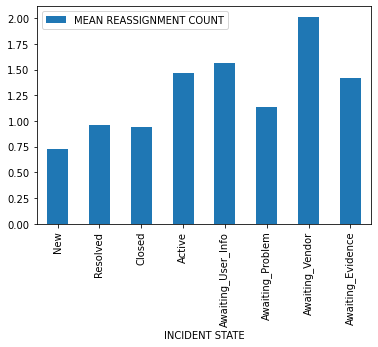

In [28]:
df_2 = pd.DataFrame({'INCIDENT STATE':['New', 'Resolved', 'Closed','Active','Awaiting_User_Info','Awaiting_Problem','Awaiting_Vendor','Awaiting_Evidence'], 'MEAN REASSIGNMENT COUNT':[New.mean(),Resolved.mean(),Closed.mean(),Active.mean(),Awaiting_User_Info.mean(),Awaiting_Problem.mean(),Awaiting_Vendor.mean(),Awaiting_Evidence.mean()]})
ax = df_2.plot.bar(x='INCIDENT STATE', y='MEAN REASSIGNMENT COUNT', rot=0)
plt.xticks(rotation = 90)

**Hypothesis for the test:**
   * H0 : The mean reassignment_count for all groups are equal 
   * Ha : The means reassignment_count for all groups are not equal 
        
**if P_value < 0.05 then we will REJECT the null hypothesis(H0).**

In [29]:
t_stats, p_value = f_oneway(New,Resolved,Closed,Active, Awaiting_User_Info,Awaiting_Problem,Awaiting_Vendor,Awaiting_Evidence)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 750.3831333109733
The p_value of the test is : 0.0


* **As the P_value is <0.05 we will reject the null hypothesis.**
* The means are different for different groups, which means that this feature is important for our modelling.

* **We will now perform another ANOVA test for incident_state and the reopen_count, to check if the the reopen count is different for different incident_state and if it is not different then we can just remove the reopen_count feature.**

In [30]:
ISROC_group_by = final_df[['incident_state','reopen_count']].groupby("incident_state")


New = ISROC_group_by.get_group("New")['reopen_count']
Resolved = ISROC_group_by.get_group("Resolved")['reopen_count']
Closed = ISROC_group_by.get_group("Closed")['reopen_count']
Active = ISROC_group_by.get_group("Active")['reopen_count']
Awaiting_User_Info = ISROC_group_by.get_group("Awaiting User Info")['reopen_count']
Awaiting_Problem = ISROC_group_by.get_group("Awaiting Problem")['reopen_count']
Awaiting_Vendor = ISROC_group_by.get_group("Awaiting Vendor")['reopen_count']
Awaiting_Evidence = ISROC_group_by.get_group("Awaiting Evidence")['reopen_count']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

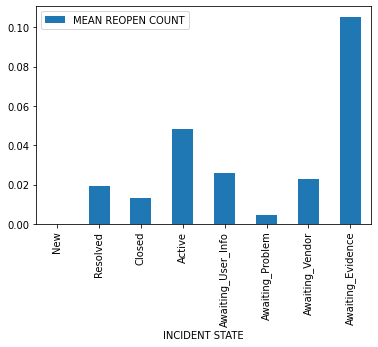

In [31]:
df_3 = pd.DataFrame({'INCIDENT STATE':['New', 'Resolved', 'Closed','Active','Awaiting_User_Info','Awaiting_Problem','Awaiting_Vendor','Awaiting_Evidence'], 'MEAN REOPEN COUNT':[New.mean(),Resolved.mean(),Closed.mean(),Active.mean(),Awaiting_User_Info.mean(),Awaiting_Problem.mean(),Awaiting_Vendor.mean(),Awaiting_Evidence.mean()]})
ax = df_3.plot.bar(x='INCIDENT STATE', y='MEAN REOPEN COUNT', rot=0)
plt.xticks(rotation = 90)

**Hypothesis for the test:**
   * H0 : The mean reopen_count for all groups are equal 
   * Ha : The means reopen_count for all groups are not equal 
        
**if P_value < 0.05 then we will REJECT the null hypothesis(H0).**

In [32]:
t_stats,p_value = f_oneway(New,Resolved,Closed,Active, Awaiting_User_Info,Awaiting_Problem,Awaiting_Vendor,Awaiting_Evidence)


print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 158.55413691433498
The p_value of the test is : 1.838061610989181e-234


* **As the P_value is <0.05 we will reject the null hypothesis.**
* The means are different for different groups, which means that this feature is important for our modelling.

* **We will do the last ANOVA test for priority and time and check if the resolved time is different for different priority groups.**

In [33]:
PT_group_by = final_df[['priority','TIME']].groupby("priority")


high = PT_group_by.get_group('2 - High')['TIME']
low = PT_group_by.get_group('4 - Low')['TIME']
critical = PT_group_by.get_group('1 - Critical')['TIME']
moderate = PT_group_by.get_group('3 - Moderate')['TIME']

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

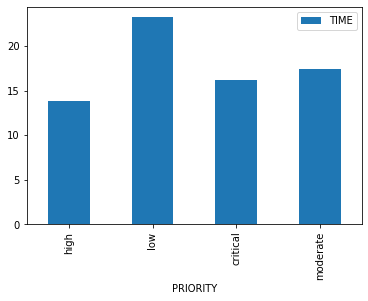

In [34]:
df_4 = pd.DataFrame({'PRIORITY':['high', 'low', 'critical','moderate'], 'TIME':[high.mean(),low.mean(),critical.mean(),moderate.mean()]})
ax = df_4.plot.bar(x='PRIORITY', y='TIME', rot=0)
plt.xticks(rotation = 90)

**Hypothesis for the test:**
   * H0 : The mean time for all groups are equal 
   * Ha : The means time for all groups are not equal 
        
**if P_value < 0.05 then we will REJECT the null hypothesis(H0).**

In [35]:
t_stats,p_value = f_oneway(high,low,critical,moderate)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 78.68444471652018
The p_value of the test is : 7.485667435221061e-51


* **As the P_value is <0.05 we will reject the null hypothesis.**
* The means are different for different groups, which means that this feature is important for our modelling.

**We will do a 2-sample T test.**

In [36]:
made_sla_time_group_by = final_df[['made_sla','TIME']].groupby('made_sla')

In [37]:
true = made_sla_time_group_by.get_group(True)['TIME']
false = made_sla_time_group_by.get_group(False)['TIME']

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

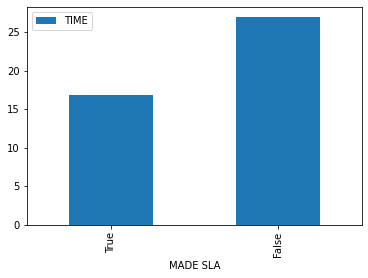

In [38]:
df_5 = pd.DataFrame({'MADE SLA':['True', 'False'], 'TIME':[true.mean(),false.mean()]})
ax = df_5.plot.bar(x='MADE SLA', y='TIME', rot=0)
plt.xticks(rotation = 90)

**Checking if the samples are normally distributed.**
   * H0 : data is normal
   * Ha : data is not normal

In [39]:
t_stats,p_value = shapiro(true)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 0.42172473669052124
The p_value of the test is : 0.0


In [40]:
t_stats,p_value = shapiro(false)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 0.49399346113204956
The p_value of the test is : 0.0


* **As the P_value is <0.05 we will reject the null hypothesis test, which means the data is not normal , so we wil do the non-parametric test.**
* As the samples are independent , the test for non parametric independent 2 samples is MANNWHITNEYU. 

In [41]:
t_stats, p_value = mannwhitneyu(true,false)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 324286780.5
The p_value of the test is : 0.0


In [42]:
final_df.head()

,incident_state,reassignment_count,reopen_count,sys_mod_count,priority,made_sla,location,category,subcategory,TIME
0,New,0,0,0,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
1,Resolved,0,0,2,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
2,Resolved,0,0,3,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
3,Closed,0,0,4,3 - Moderate,True,Location 143,Category 55,Subcategory 170,6.0
4,New,0,0,0,3 - Moderate,True,Location 165,Category 40,Subcategory 215,7.0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df_dummy = pd.get_dummies(final_df,columns=['incident_state','made_sla','location','category',
                                                 'subcategory'],drop_first = True)

X = final_df_dummy.drop("TIME",axis = 1)
y = final_df_dummy["TIME"]

# ASSUMPTIONS OF LINEAR REGRESSION.

## Linearity

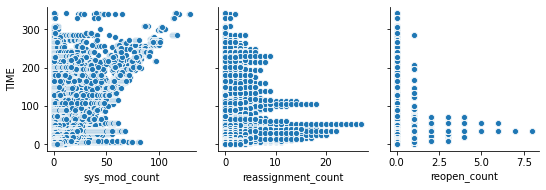

In [44]:
sns.pairplot(x_vars=['sys_mod_count',"reassignment_count","reopen_count"],y_vars =['TIME'],data = final_df)
plt.show()

* **We do not see any linear relationship between the numerical features and the respons variable.**

## Mean Of Residuals

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=100)

X_train["priority"] = le.fit_transform(X_train["priority"])
X_test["priority"] = le.transform(X_test["priority"])

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residuals = y_pred-y_test
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is 7133.384696976365


* **THE MEAN OF THE RESIDUALS MUST BE ZERO.**

## HomoScedasticity

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,X_test)
lzip(name, test)

[('F statistic', 1.058265998966144), ('p-value', 0.010290462803474508)]

* H0: Error terms are homoscedastic
* Ha: Error terms are not homoscedastic

**p-value < 0.05 reject null hypothesis, error terms are not homoscedastic**

## Test of normality of residuals.

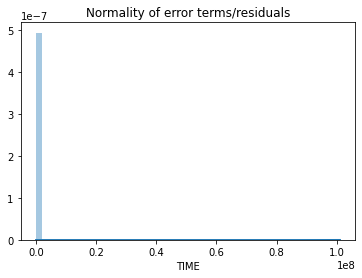

In [48]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

* **The distribution clearly show's that the residuals are not normally distributed. We can also check using the SHAPIRO test.**

In [49]:
t_stats, p_value = shapiro(residuals)

print(f"The t_statistic value is : {t_stats}")
print(f"The p_value of the test is : {p_value}")

The t_statistic value is : 0.0012115836143493652
The p_value of the test is : 0.0


* **As the P_value is <0.05 we will reject the null hypothesis test, which means the data is not normal**

## Auto Co-relation.

In [50]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.9933035915976055

 * Ho: Auto correlation is absent.
 * Ha: Auto correlation is present.
* **The P-value is >0.05 ,we fail to reject the null hypothesis, auto co relation is absent.**


## Multi- colinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
numerical_x = X.select_dtypes("int64")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_x.values, i) for i in range(numerical_x.shape[1])]
vif["features"] = numerical_x.columns

In [53]:
vif

,VIF Factor,features
0,1.805317,reassignment_count
1,1.074863,reopen_count
2,1.868956,sys_mod_count


# MACHINE LEAARNING

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

In [55]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
etr = ExtraTreeRegressor()
etr2 = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
br = BaggingRegressor()
dtr = DecisionTreeRegressor()

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import r2_score

training_score = []
testing_score = []
r2 = []
MAPE =[]

### Decision Tree Regressor

In [57]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
train_score = dtr.score(X_train,y_train)
test_score = dtr.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
y_pred = dtr.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is over fitting!, train score is 0.8588322110788728 and test score is 0.5470202289890206


### Extra Tree Regressor

In [59]:
etr.fit(X_train,y_train)

ExtraTreeRegressor()

In [60]:
train_score = etr.score(X_train,y_train)
test_score = etr.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
    
y_pred = etr.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is over fitting!, train score is 0.8588322110788728 and test score is 0.562854492667151


### Random Forest Regressor

In [61]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
train_score = rfr.score(X_train,y_train)
test_score = rfr.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
y_pred = rfr.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is over fitting!, train score is 0.8376700659689598 and test score is 0.6446041547856137


### Extra Trees Regressor

In [63]:
etr2.fit(X_train,y_train)

ExtraTreesRegressor()

In [64]:
train_score = etr2.score(X_train,y_train)
test_score = etr2.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
    
y_pred = etr2.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is over fitting!, train score is 0.8588322110788728 and test score is 0.6170222958896021


### Bagging Regressor

In [65]:
br.fit(X_train,y_train)

BaggingRegressor()

In [66]:
train_score = br.score(X_train,y_train)
test_score = br.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
    
y_pred = br.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is over fitting!, train score is 0.8270335938837848 and test score is 0.6318796195615202


### AdaBoost Regressor

In [67]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [68]:
train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    

y_pred = abr.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is okay, more tuning can be done, train score is -0.19412912664648596, test score is -0.20999837970359758


### Gradient Boost Regressor

In [69]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [70]:
train_score = gbr.score(X_train,y_train)
test_score = gbr.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
    
y_pred = gbr.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is okay, more tuning can be done, train score is 0.5653708304757947, test score is 0.5723905735444199


## Grid Search GBR

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
params = {'learning_rate':[0.1,0.01],
         'n_estimators':[100,200],'max_depth':[3,4]}

In [73]:
grid_gbr = GridSearchCV(gbr, param_grid = params)

In [74]:
grid_gbr.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 4],
                         'n_estimators': [100, 200]})

In [78]:
best_params = grid_gbr.best_params_


final_gbr = GradientBoostingRegressor(n_estimators = best_params['n_estimators'],
                learning_rate = best_params['learning_rate'],max_depth = best_params['max_depth'])

final_gbr.fit(X_train,y_train)

train_score = final_gbr.score(X_train,y_train)
test_score = final_gbr.score(X_test,y_test)
if train_score > test_score+0.1:
    print(f"Model is over fitting!, train score is {train_score} and test score is {test_score}")
elif train_score+0.1 < test_score:
    print(f"Model is under fitting!, train score is {train_score} and test score is {test_score}")
else:
    print(f"Model is okay, more tuning can be done, train score is {train_score}, test score is {test_score}")
    
y_pred = final_gbr.predict(X_test)
MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
training_score.append(train_score)
testing_score.append(test_score)
r2.append(r2_score(y_test,y_pred))

Model is okay, more tuning can be done, train score is 0.6215189120635863, test score is 0.6189033995473183


In [80]:
ALL_SCORES = pd.DataFrame({"Model":["Decision Tree","Extra Tree","Random Forest","Extra Trees","Bagging","Ada Boost","Gradient Boost","Grid Search GBR"],"Training Score":training_score,"Testing Score":testing_score,"R2":r2,"MAPE":MAPE})

In [81]:
ALL_SCORES

,Model,Training Score,Testing Score,R2,MAPE
0,Decision Tree,0.858832,0.547020,0.547020,NaN
1,Extra Tree,0.858832,0.562854,0.562854,NaN
2,Random Forest,0.837670,0.644604,0.644604,inf
3,Extra Trees,0.858832,0.617022,0.617022,NaN
4,Bagging,0.827034,0.631880,0.631880,inf
5,Ada Boost,-0.194129,-0.209998,-0.209998,inf
6,Gradient Boost,0.565371,0.572391,0.572391,inf
7,Grid Search GBR,0.621519,0.618903,0.618903,inf
